# Jupyter Notebook using OpenCV

# Histogram Calculation

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

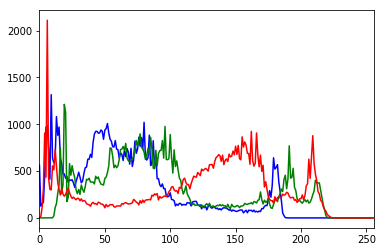

In [3]:
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
# channels: contains te indices of channels for which we calculate a histogram
# mask: mask image, to find histogram of full image pick None
# histSize: represents the number of bins, for full scale pick 256 (0-255)
img = cv2.imread('tennisball.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

# Backprojection

In [16]:
roi = cv2.imread('banana_background.jpg')
hsvr = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)

original = cv2.imread('banana.jpg')
hsvt = cv2.cvtColor(original,cv2.COLOR_BGR2HSV)

# calculate roi histogram, take h and s channels -> [0,1] for the whole image -> None, 256 bins and full range
roihist = cv2.calcHist([hsvr],[0, 1], None, [256, 256], [0, 256, 0,256] )

# normalize roi histogram and apply backprojection
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0, 256, 0, 256],1)
cv2.imwrite('dst.jpg',dst)

# remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,kernel, dst)

# apply threshold and bitwise AND
_,mask = cv2.threshold(dst,20,255,0)
mask = cv2.merge((mask,mask,mask))
res = cv2.bitwise_and(original,mask)

res = np.vstack((original,mask,res))
cv2.imwrite('res.jpg',res)

True